In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

data=pd.read_csv("https://raw.githubusercontent.com/pcsanwald/kaggle-titanic/master/train.csv")
data

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [3]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.isnull().sum()

,0
survived,0
pclass,0
name,0
sex,0
age,177
sibsp,0
parch,0
ticket,0
fare,0
cabin,687


In [5]:
mode=data['embarked'].mode()[0]
data['embarked'].fillna(mode,inplace=True)
mode

'S'

In [6]:
data.isnull().sum()

,0
survived,0
pclass,0
name,0
sex,0
age,177
sibsp,0
parch,0
ticket,0
fare,0
cabin,687


In [7]:
data.nunique()

,0
survived,2
pclass,3
name,891
sex,2
age,88
sibsp,7
parch,7
ticket,681
fare,248
cabin,147


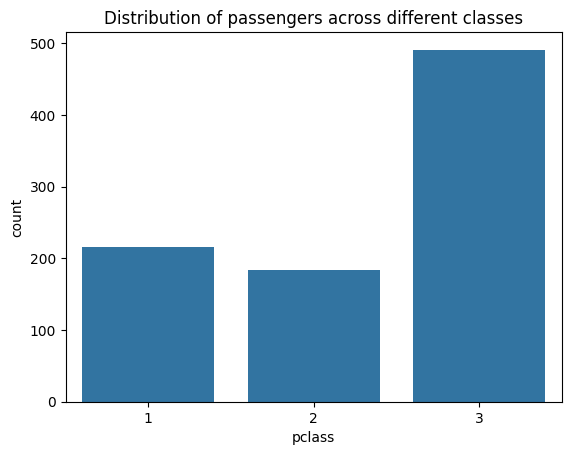

In [8]:
sns.countplot(x='pclass',data=data)
plt.title("Distribution of passengers across different classes")
plt.show()

<Axes: xlabel='age', ylabel='Density'>

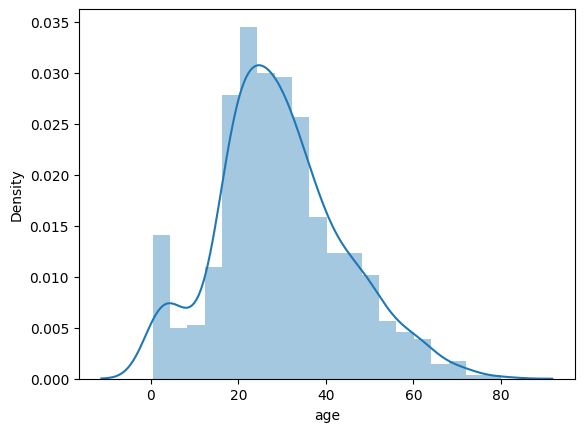

In [9]:
sns.distplot(data['age'])


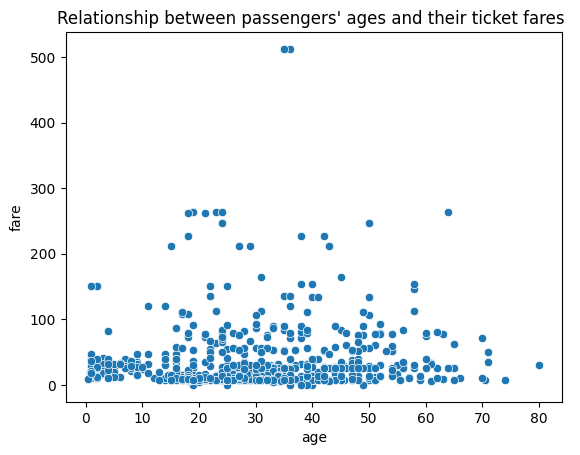

In [10]:
sns.scatterplot(x='age',y='fare',data=data)
plt.title("Relationship between passengers' ages and their ticket fares ")
plt.show()

<Axes: >

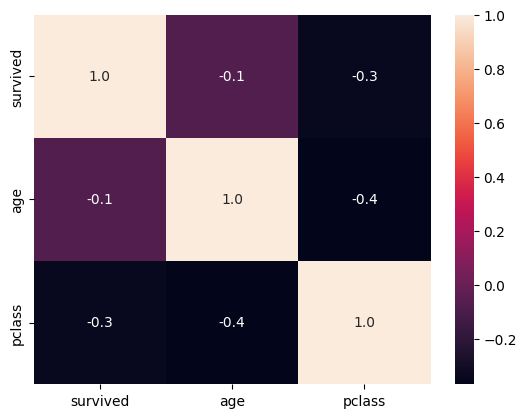

In [11]:
data1=data[['survived','age','pclass']]
matrix=data1.corr()
sns.heatmap(matrix,annot=True,fmt='.1f')

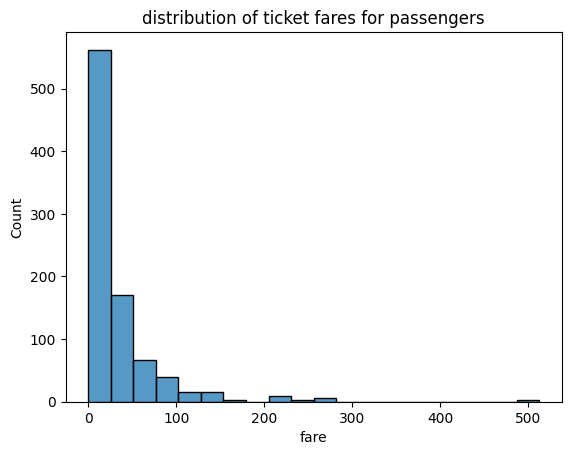

In [12]:
sns.histplot(data['fare'],bins=20)
plt.title("distribution of ticket fares for passengers")
plt.show()

<Axes: >

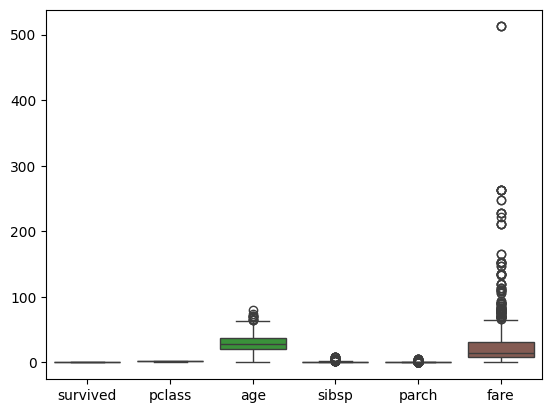

In [13]:
sns.boxplot(data=data)

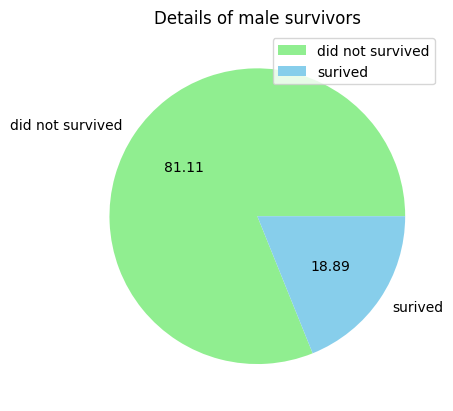

In [14]:
male_surv=data[data['sex']=='male']
count=male_surv['survived'].value_counts()
labels=['did not survived','surived']
color=['lightgreen','skyblue']
plt.pie(count,labels=labels,colors=color,autopct='%.2f',data=data)
plt.title('Details of male survivors')
plt.legend()

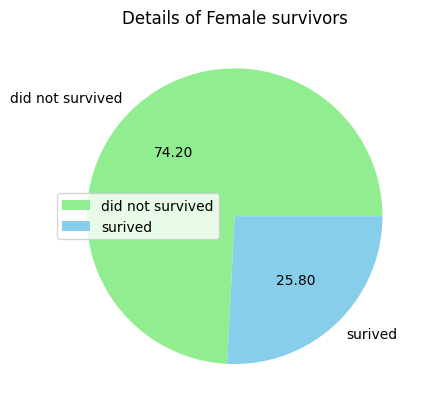

In [16]:
female_surv=data[data['sex']=='female']
count=female_surv['survived'].value_counts()
labels=['did not survived','surived']
color=['lightgreen','skyblue']
plt.pie(count,labels=labels,colors=color,autopct='%.2f',data=data)
plt.title('Details of Female survivors')
plt.legend()

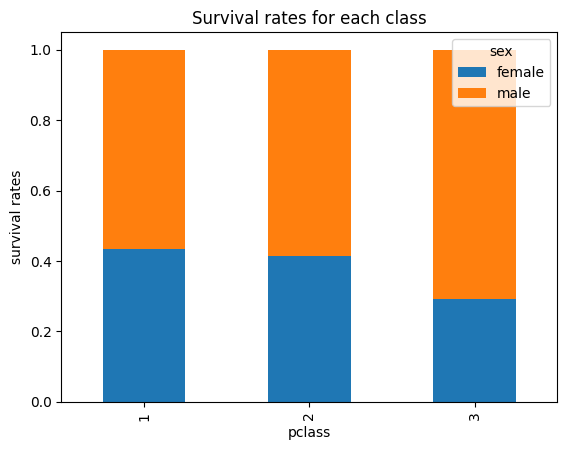

In [17]:
tab=pd.crosstab(data['pclass'],data['sex'])
a=tab.div(tab.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('pclass')
plt.ylabel('survival rates')
plt.title('Survival rates for each class')
plt.show()

In [18]:
# Create 'FamilySize' feature
data['FamilySize'] = data['sibsp'] + data['parch'] + 1
# Extract 'Title' from 'Name'
data['title'] = data['name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
# Fill missing 'Age' values with median age
data['age'].fillna(data['age'].median(), inplace=True)
# Fill missing 'Embarked' values with the most common embarkation point
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)
# Convert 'Fare' into categorical bins
data['farebin'] = pd.qcut(data['fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
# One-Hot Encoding for categorical variables
data = pd.get_dummies(data, columns=['sex', 'embarked', 'pclass', 'title', 'farebin'], drop_first=True)
# Display the first few rows of the engineered dataset
data.head()

,survived,name,age,sibsp,parch,ticket,fare,cabin,FamilySize,sex_male,...,title_Mme,title_Mr,title_Mrs,title_Ms,title_Rev,title_Sir,title_the Countess,farebin_Medium,farebin_High,farebin_Very High
0,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,2,True,...,False,True,False,False,False,False,False,False,False,False
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,2,False,...,False,False,True,False,False,False,False,False,False,True
2,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,False,...,False,False,False,False,False,False,False,True,False,False
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,2,False,...,False,False,True,False,False,False,False,False,False,True
4,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,True,...,False,True,False,False,False,False,False,True,False,False


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
# Assuming 'Survived' is the target variable
X = data.drop(['survived', 'name', 'ticket', 'cabin'], axis=1)
y = data['survived']
# Initialize RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model
model.fit(X, y)
# Select features based on feature importance
selector = SelectFromModel(model, prefit=True)
X_selected = selector.transform(X)
# Get selected feature names
selected_features = X.columns[selector.get_support()]
# Display selected features
print("Selected Features:", selected_features)

Selected Features: Index(['age', 'sibsp', 'fare', 'FamilySize', 'sex_male', 'pclass_3',
       'title_Mr'],
      dtype='object')


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
# Separating features and target variable
X = data[['FamilySize', 'age', 'sex_male', 'pclass_2', 'pclass_3', 'title_Mr',
 'farebin_Medium', 'farebin_High', 'farebin_Very High']]
y = data['survived']
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
y_pred = dt_classifier.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8156424581005587
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       105
           1       0.77      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

